# Social Network Analysis @ UNIPI
### 13/01/2023 - second part (sull'overleaf: fourth_full(2stpart))

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Ex. 1: Community Evaluation [5 points]

Given the graph $\mathcal{G}$, compare the following partitions.

- $[(1,2,4,5,6),(3,7,8,9)]$
- $[(1,2),(6,7,8), (3,4,5,9)]$

Which partition is best with respect to the modularity score? which for conductance?

In [2]:
g = nx.Graph()

In [19]:
g.add_edge(1, 2)
g.add_edge(4, 1)
g.add_edge(6, 2)
g.add_edge(8, 6)
g.add_edge(4, 5)
g.add_edge(5, 6)
g.add_edge(6, 7)
g.add_edge(7, 8)
g.add_edge(8, 9)
g.add_edge(9, 4)
g.add_edge(4, 3)
g.add_edge(5, 3)
g.add_edge(8, 3)
g.add_edge(9, 3)
g.add_edge(2, 5)

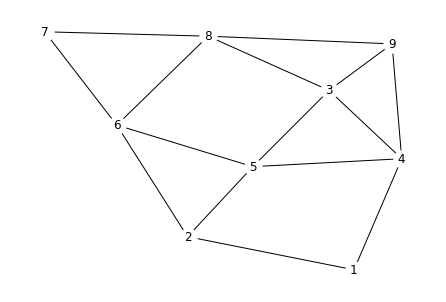

In [20]:
nx.draw_spring(g, with_labels=True, node_color="w")
plt.savefig("net.png")

### Modularity

In [21]:
def modularity(graph, community):
    vc = len(community)
    e = graph.number_of_edges()
    degC = sum([i[1] for i in graph.degree(community)])
    return ((vc/e) - (degC/(2*e)))**2

In [22]:
f"P1 - C1: {modularity(g, [1, 2, 4, 5, 6])} C2: {modularity(g, [3, 7, 8, 9])}"

'P1 - C1: 0.05444444444444445 C2: 0.027777777777777783'

In [35]:
f"P2 - C1: {modularity(g, [1, 2])} C2: {modularity(g, [6, 7, 8, 9])} C3: {modularity(g, [3, 4, 5])}"

'P2 - C1: 0.0011111111111111107 C2: 0.027777777777777783 C3: 0.04000000000000001'

#### Best Partition (Modularity): P3

In [36]:
max(0.2, 0.001)

0.2

### Conductance

In [25]:
def conductance(graph, community):
    gs = nx.subgraph(graph, community)
    ec = gs.number_of_edges()
    eoc = sum([len(list(graph.neighbors(u)))-len(list(gs.neighbors(u))) for u in community])
    return (2*eoc)/((2*ec)+eoc)

In [26]:
f"P1 - C1: {conductance(g, [1, 2, 4, 5, 6])} C2: {conductance(g, [3, 7, 8, 9])}"

'P1 - C1: 0.5882352941176471 C2: 0.7692307692307693'

In [37]:
f"P2 - C1: {conductance(g, [1, 2])} C2: {conductance(g, [6, 7, 8, 9])} C3: {conductance(g, [3, 4, 5])}"

'P2 - C1: 1.2 C2: 0.7692307692307693 C3: 1.0'

#### Best partition (conductance): P1

In [28]:
min(0.7692307692307693, 1)

0.7692307692307693

## Ex. 2: Community Discovery [4 points]

Given graph $\mathcal{G}$, compute its communities applying k-clique for k=3,4.

On the obtained partitions evaluate the coverage and internal edge density.

In [29]:
from networkx.algorithms.community import k_clique_communities

k3 = list(k_clique_communities(g, 3))
k3 # complete coverage

[frozenset({2, 5, 6}), frozenset({3, 4, 5, 8, 9}), frozenset({6, 7, 8})]

In [30]:
list(k_clique_communities(g, 4)) # empty coverage

[]

### Internal Edge Density

In [31]:
def ied(graph, community):
    sg = nx.subgraph(graph, community)
    ec = sg.number_of_edges()
    vc = sg.number_of_nodes()
    return (2*ec)/(vc*(vc-1))

In [32]:
ed = []
for com in k3:
    
    ed.append(ied(g, com))
min(ed)

0.7

## Es 3: Threshold Model [5 points]

Given the graph $\mathcal{G}$, applying the threshold model considering the following scenarios:

- S1
    - Set of initial infected nodes: I = {3}
    - Node threshold $\tau = \frac{1}{3}$
- S2
    - Set of initial infected nodes: I = {1}
    - Node threshold at iteration $t$ $\tau_t = \frac{1}{2+t}$
  
Consider a node infected at time $t$ iff at least $\tau\%$ of its neighbors were already infected at $t-1$.

### S1

In [33]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as epd

# Model selection
model = epd.ThresholdModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_initial_configuration("Infected", [3])

# Setting node parameters
threshold = 1/3
for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(6)
for it in iterations:
    infected = [i for i, v in it['status'].items() if v == 1]
    print(f"Iteration: {it['iteration']} Infected: {infected}")

Iteration: 0 Infected: [3]
Iteration: 1 Infected: [9]
Iteration: 2 Infected: [4, 8]
Iteration: 3 Infected: [1, 5, 7]
Iteration: 4 Infected: [2, 6]
Iteration: 5 Infected: []


In [34]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as epd

# Model selection
model = epd.ThresholdModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_initial_configuration("Infected", [1])

model.set_initial_status(config)

for t in range(5):
    # threshold update
    threshold = 1/(2+t)
    for i in g.nodes():
        config.add_node_configuration("threshold", i, threshold)

    it = model.iteration()
    infected = [i for i, v in it['status'].items() if v == 1]
    print(f"Iteration: {it['iteration']} Infected: {infected}")

Iteration: 0 Infected: [1]
Iteration: 1 Infected: [2]
Iteration: 2 Infected: [4, 6, 5]
Iteration: 3 Infected: [8, 7, 9, 3]
Iteration: 4 Infected: []


## Ex. 4: Open Question [2 points]
What is the "Achille's heals of scale free networks"? Discuss its effects and applications; justify the reasons such property does not hold for random graphs.